In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ionosphere/ionosphere_data.csv
/kaggle/input/ionosphere/datapackage.json


In [2]:
import numpy as np
import pandas as pd
iono=pd.read_csv("/kaggle/input/ionosphere/ionosphere_data.csv")
X=iono.iloc[:,:-1]
Y=iono.iloc[:,-1]
print(X.shape)

(351, 34)


In [3]:
print(Y.shape)

(351,)


In [4]:
print(X.dtypes)

column_a        bool
column_b        bool
column_c     float64
column_d     float64
column_e     float64
column_f     float64
column_g     float64
column_h     float64
column_i     float64
column_j     float64
column_k     float64
column_l     float64
column_m     float64
column_n     float64
column_o     float64
column_p     float64
column_q     float64
column_r     float64
column_s     float64
column_t     float64
column_u     float64
column_v     float64
column_w     float64
column_x     float64
column_y     float64
column_z     float64
column_aa    float64
column_ab    float64
column_ac    float64
column_ad    float64
column_ae    float64
column_af    float64
column_ag    float64
column_ah    float64
dtype: object


In [5]:
print(" 遺漏{}個數值".format(X.isnull().sum().sum()))

 遺漏0個數值


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=14)
print("訓練集有{}個樣本".format(X_train.shape[0]))

訓練集有263個樣本


In [7]:
print("測試集有{}個樣本".format(X_test.shape[0]))

測試集有88個樣本


In [8]:
print("每個樣本有{}屬性".format(X_train.shape[1]))

每個樣本有34屬性


In [9]:
print("資料集類別分佈為：\n{}.".format(Y.value_counts()/len(Y)))

資料集類別分佈為：
column_ai
g    0.641026
b    0.358974
Name: count, dtype: float64.


In [10]:
print("訓練集類別資料分佈為：\n{}.".format(Y_test.value_counts()/len(Y_train)))

訓練集類別資料分佈為：
column_ai
g    0.216730
b    0.117871
Name: count, dtype: float64.


In [11]:
print("測試集類別分佈為:\n{}.".format(Y_test.value_counts()/len(Y_test)))

測試集類別分佈為:
column_ai
g    0.647727
b    0.352273
Name: count, dtype: float64.


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
X_std=sc.fit_transform(X)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
estimator.fit(X_train_std,Y_train)
for name in['metric','n_neighbors','p']:
    print(estimator.get_params()[name])

minkowski
5
2


In [14]:
train_pred=estimator.predict(X_train_std)
print(train_pred[:5])

['b' 'g' 'b' 'g' 'b']


In [15]:
print(Y_train[:5])

51     b
24     g
168    b
136    b
71     b
Name: column_ai, dtype: object


In [16]:
train_acc=np.mean(Y_train==train_pred)*100
print("訓練集正確率為{0:.1f}%".format(train_acc))

訓練集正確率為87.1%


In [17]:
Y_pred=estimator.predict(X_test_std)
print(Y_pred[:5])

['g' 'g' 'g' 'g' 'g']


In [18]:
print(Y_test[:5])

14     g
1      b
44     g
245    g
288    g
Name: column_ai, dtype: object


In [19]:
test_acc=np.mean(Y_test==Y_pred)*100
print("測試集正確率為{0:.1f}%".format(test_acc))

測試集正確率為85.2%


交叉驗證
計算各次交叉驗證配適之模型的績效分數。依序傳入配適的模型，用以配適模型的資料，以及評估各次配適結果優劣的績效指標，運算完成函數傳回三次交叉驗證的正確分數為scores，計算算數平均數再印出結果，請注意此次結果的近鄰數k

In [20]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator,X_std,Y,scoring='accuracy')
print(scores.shape)

(5,)


In [21]:
average_accuracy=np.mean(scores)*100
print("五次平均正確率為{0:.1f}%".format(average_accuracy))

五次平均正確率為82.9%


交叉驗證常用來調校學習中的參數，串列存放鄰近數k從1到20的整數測試值，for迴圈針對每一個可能的k值反覆執行以下運算
1.先設定k鄰近分類模型的規格（空模的近鄰數）
2.呼叫cross_val_score()函數，取得五次交叉驗證的正確率分數sc
3.再計算正確平均值np.mean(sc)
4.將結果添加到不同的k值下的平均正確率分數串列avg_scores與各k值下五次的交叉驗證正確率順串列中。


In [22]:
avg_scores=[]
all_scores=[]
parameter_values=list(range(1,21))
for n_neighbors in parameter_values:
    estimator=KNeighborsClassifier(n_neighbors=n_neighbors)
    sc=cross_val_score(estimator,X_std,Y,scoring="accuracy")
    avg_scores.append(np.mean(sc))
    all_scores.append(sc)

In [23]:
print(len(avg_scores))

20


In [24]:
print(avg_scores)

[0.831830985915493, 0.8718712273641852, 0.8319114688128775, 0.8404828973843059, 0.8290945674044264, 0.8404426559356135, 0.817625754527163, 0.8290543259557344, 0.8119114688128773, 0.817625754527163, 0.817625754527163, 0.8319114688128773, 0.8176659959758551, 0.823380281690141, 0.8090945674044265, 0.8090945674044265, 0.8033802816901409, 0.8090945674044265, 0.7919517102615694, 0.800523138832998]


In [25]:
print(len(all_scores))

20


In [26]:
print(all_scores[:4])

[array([0.85915493, 0.75714286, 0.81428571, 0.88571429, 0.84285714]), array([0.84507042, 0.82857143, 0.82857143, 0.94285714, 0.91428571]), array([0.83098592, 0.77142857, 0.75714286, 0.92857143, 0.87142857]), array([0.83098592, 0.8       , 0.77142857, 0.92857143, 0.87142857])]


將20次不同相鄰對應交叉驗證正確率平均值匯成折線圖，可以看出平均正確率升高後漸次震盪而下，最高的正確率發生在k=2

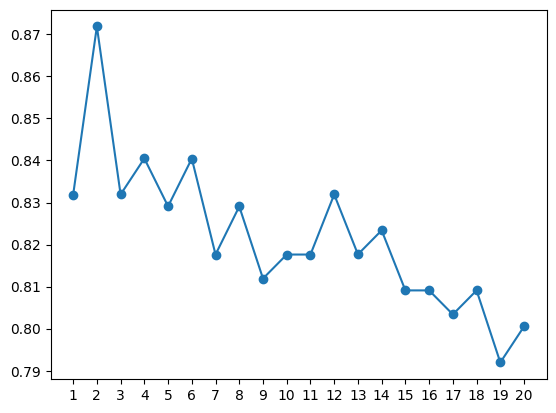

In [27]:
from matplotlib import pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
plt.xticks(np.arange(0,21))
ax.plot(parameter_values,avg_scores,'-o')

pipeline()類別將資料分析步驟流程化，整個流程名稱為pipe,包括scale和predict兩個步驟，分別調用MinMaxScaler()和KNeighborsClassifier()函數，進行屬性矩陣標準化與鄰近分類建模。然後將定義好的流程，原始預測變數資料框，類別標籤序列與評估方法等傳入交叉驗證運算執行函數，完成整個分析流程。

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([('scale',MinMaxScaler()),('predict',KNeighborsClassifier())])
scores=cross_val_score(pipe,X,Y,scoring="accuracy")
print("正確結果為{}%:".format(scores*100))

正確結果為[84.50704225 80.         77.14285714 88.57142857 84.28571429]%:


In [29]:
print("平均正確率為{0:.1f}%".format(np.mean(scores)*100))

平均正確率為82.9%
